# Problem 1

## (a) Write down the discretized version of the PDE.

$\frac{y_{i+1} - 2y_{i} + y_{i-1}}{h^2} + \frac{1}{4}x_{i} \frac{y_{i+1} - y_{i-1}}{2h} + y_{i} = (x_{i})^2$

$y_{i+1}(8 + h x_{i}) + y_{i} (-16 + 8h^2) + y_{i-1}(8 - hx_{i}) = 8h^2(x_{i})^2$

$y_{i+1} = \frac{8h^2(x_{i})^2 - y_{i} (-16 + 8h^2) - y_{i-1}(8 - hx_{i})}{(8 + h x_{i})}$

---

$\pagebreak$

## (b) Plot the approximate solution y(x) vs x in the domain with h=0.1, 0.01, 0.001. Plot the results with both axes and legend.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_N(a,b,H):
    #N = ((b-a)/h)-1
    N = ((b-a)/H)
    return N

def P(x):
    return (-1/4)*x

def Q(x):
    return -1

def R(x):
    return x**2

def D(H,idx):
    return 2 + (H**2)*Q(idx)

def U(H,idx):
    return -1 + (H/2)*P(idx)

def L(H,idx):
    return -1 - (H/2)*P(idx)

def finite_central_difference(a,b,h,alpha,beta):
    N = calculate_N(a,b,h)
    #print(f"N is: {N}")
    #print()
    
    x = np.linspace(a,b,int(N+1))
    #print(x)
    
    mat_size = (int(N+1),int(N+1))
    A = np.zeros(mat_size)
    
    A[0,0] = D(h,0) #d0 Neumann B.C.
    A[0,1] = -2 # Neumann B.C.
    A[int(N),int(N)] = 1 # Dirichlet B.C.
    A[int(N),int(N-1)] = 0 # Dirichlet B.C.
    #print(f"Initialize A = {A}")
    #print()
    
    B = np.zeros(int(N+1))
    B[0] = -(h**2)*R(0)+ 2*h*L(h,0)*alpha # Neumann B.C.
    B[int(N)] = beta # Dirichlet B.C.
    #print(f"Initialize b = {B}")
    #print()
    
    for idx in range(1,int(N)):
        #A[idx,idx-1] = L(h,idx)
        #A[idx,idx] = D(h,idx)
        #A[idx, idx+1] = U(h,idx)
        
        A[idx,idx-1] = L(h,x[idx])
        A[idx,idx] = D(h,x[idx])
        A[idx, idx+1] = U(h,x[idx])
    #print(f"Final A = {A}")
    #print()
    
    for idx in range(1,int(N)):
        #B[idx] = -h**2*r(idx)
        B[idx] = -(h**2)*R(x[idx])
    #print(f"Final b = {B}")
    #print()
    
    W = np.linalg.solve(A,B)
    #print(f"Approximate Solution = {W}")
    
    # Plot
    plt.plot(x, W, '-x',label=f'$h = {h}$')
    plt.xlabel('x')
    plt.ylabel('Approximate y(x)')
    plt.title('BVP Solution y(x)')
    plt.legend()
    plt.grid()
    plt.show()
    
    return A, B, W, x

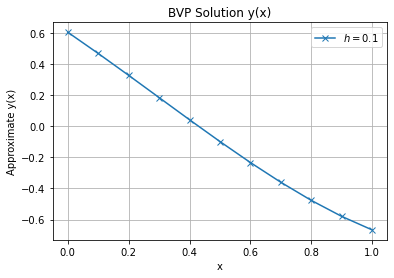

In [2]:
h = 0.1
a = 0
alpha = -4/3# Neumann B.C
b = 1
beta = -2/3 # Dirichlet B.C
#alpha = 0# Neumann B.C
#beta = 1 # Dirichlet B.C

A1,b1,y1,x1 = finite_central_difference(a,b,h,alpha,beta)

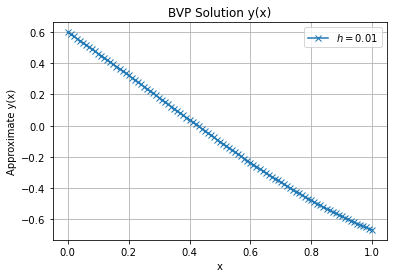

In [3]:
h = 0.01
a = 0
alpha = -4/3# Neumann B.C
b = 1
beta = -2/3 # Dirichlet B.C
#alpha = 0# Neumann B.C
#beta = 1 # Dirichlet B.C

A2,b2,y2,x2 = finite_central_difference(a,b,h,alpha,beta)

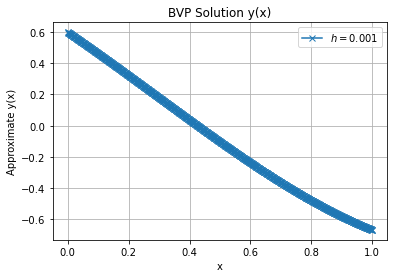

In [4]:
h = 0.001
a = 0
alpha = -4/3# Neumann B.C
b = 1
beta = -2/3 # Dirichlet B.C
#alpha = 0# Neumann B.C
#beta = 1 # Dirichlet B.C

A3,b3,y3,x3 = finite_central_difference(a,b,h,alpha,beta)

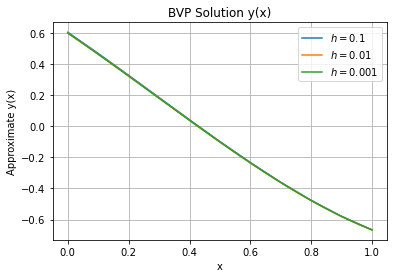

In [5]:
plt.plot(x1, y1,label=f'$h = 0.1$')
plt.plot(x2, y2,label=f'$h = 0.01$')
plt.plot(x3, y3,label=f'$h = 0.001$')
plt.xlabel('x')
plt.ylabel('Approximate y(x)')
plt.title('BVP Solution y(x)')
plt.legend()
plt.grid()
plt.show()

---

$\pagebreak$

## (c) Discuss your results in terms of accuracy and convergence.

* The plot shows that for different values of h, the y(x) approximation does not change indicating that the solution is accurate.
* The different solutions from different values of h converge at a single point at x = 1, indicating that the solution is convergent.

---
$\pagebreak$

# Problem 2

## (a) Write down the discretized version of the PDE.

$\frac{u_{i+1} - 2u_{i} + u_{i-1}}{h^2} = -(x+2)\frac{u_{i+1} - u_{i-1}}{2h} + u_{i} + (4+x_{i} - x_i^2)e^{-x_i}$

$u_{i+1} = \frac{u_i (4+2h^2)+u_{i-1}(hx+2h+2)+2h^2(4+x_{i}-x_i^2)e^{-x_i}}{2+hx+2h}$

---

$\pagebreak$

## (b) Plot the approximate solution u(x) vs x in the domain with h=0.2, 0.02, 0.002, 0.0002. Plot the results with both axes and legend.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_N(a,b,H):
    #N = ((b-a)/h)-1
    N = ((b-a)/H)
    return N

def P(x):
    return -(x+2)

def Q(x):
    return 1

def R(x):
    return (4+x-x**2)*np.exp(-x)

def D(H,idx):
    return 2 + (H**2)*Q(idx)

def U(H,idx):
    return -1 + (H/2)*P(idx)

def L(H,idx):
    return -1 - (H/2)*P(idx)

In [7]:
def finite_central_difference(a,b,h,alpha,beta):
    N = calculate_N(a,b,h)
    #print(f"N is: {N}")
    #print()
    
    x = np.linspace(a,b,int(N+1))
    #print(x)
    
    mat_size = (int(N+1),int(N+1))
    A = np.zeros(mat_size)
    
    A[0,0] = 1 # Dirichlet B.C.
    A[0,1] = 0 # Dirichlet B.C.
    A[int(N),int(N)] = 1 # Dirichlet B.C.
    A[int(N),int(N-1)] = 0 # Dirichlet B.C.
    #print(f"Initialize A = {A}")
    #print()
    
    B = np.zeros(int(N+1))
    B[0] = alpha # Dirichlet B.C.
    B[int(N)] = beta # Dirichlet B.C.
    #print(f"Initialize b = {B}")
    #print()
    
    for idx in range(1,int(N)):
        A[idx,idx-1] = L(h,x[idx])
        A[idx,idx] = D(h,x[idx])
        A[idx, idx+1] = U(h,x[idx])
    #print(f"Final A = {A}")
    #print()
    
    for idx in range(1,int(N)):
        B[idx] = -(h**2)*R(x[idx])
    #print(f"Final b = {B}")
    #print()
    
    W = np.linalg.solve(A,B)
    #print(f"Approximate Solution = {W}")
    
    # Plot
    plt.plot(x, W, '-o',label=f'$h = {h}$')
    plt.xlabel('x')
    plt.ylabel('Approximate u')
    plt.title('BVP Solution u(x)')
    plt.legend()
    plt.grid()
    plt.show()
    
    return A, B, W, x

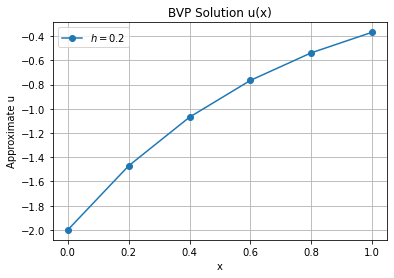

In [8]:
h = 0.2
a = 0
alpha = -2 # Dirichlet B.C
b = 1
beta = -np.exp(-1) # Dirichlet B.C

A1,b1,u1,x1 = finite_central_difference(a,b,h,alpha,beta)

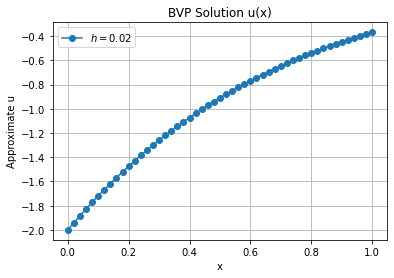

In [9]:
h = 0.02
a = 0
alpha = -2 # Dirichlet B.C
b = 1
beta = -np.exp(-1) # Dirichlet B.C

A2,b2,u2,x2 = finite_central_difference(a,b,h,alpha,beta)

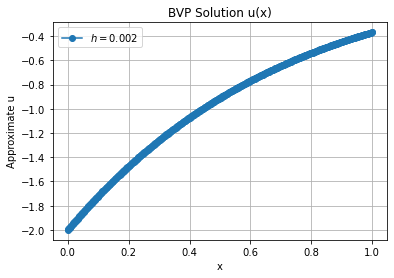

In [10]:
h = 0.002
a = 0
alpha = -2 # Dirichlet B.C
b = 1
beta = -np.exp(-1) # Dirichlet B.C

A3,b3,u3,x3 = finite_central_difference(a,b,h,alpha,beta)

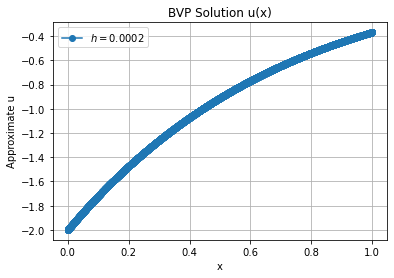

In [11]:
h = 0.0002
a = 0
alpha = -2 # Dirichlet B.C
b = 1
beta = -np.exp(-1) # Dirichlet B.C

A4,b4,u4,x4 = finite_central_difference(a,b,h,alpha,beta)

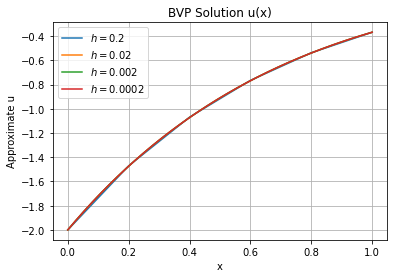

In [12]:
plt.plot(x1, u1,label=f'$h = 0.2$')
plt.plot(x2, u2,label=f'$h = 0.02$')
plt.plot(x3, u3,label=f'$h = 0.002$')
plt.plot(x4, u4,label=f'$h = 0.0002$')
plt.xlabel('x')
plt.ylabel('Approximate u')
plt.title('BVP Solution u(x)')
plt.legend()
plt.grid()
plt.show()

---

$\pagebreak$

## (c) The exact solution of this BVP is $𝑢(𝑥) = (𝑥 − 2)𝑒^{−𝑥}$. Confirm the order of accuracy of the numerical method using both the maximum absolute error $(max(|𝑢_𝑖 − 𝑢_{𝑖𝑒𝑥𝑎𝑐𝑡}|))$ . Plot the error vs h.

In [13]:
def exact_u(x_grid):
    exact_sol = []
    for x in x_grid:
        sol = (x-2)*np.exp(-x)
        exact_sol.append(sol)
    return exact_sol

exact_sol_1 = exact_u(x1)
exact_sol_2 = exact_u(x2)
exact_sol_3 = exact_u(x3)
exact_sol_4 = exact_u(x4)

def calcualate_absolute_error(approx,exact):
    error = []
    for w,u in zip(approx,exact):
        e = np.abs(w - u)
        error.append(e)
    return error

error1 = calcualate_absolute_error(u1,exact_sol_1)
error2 = calcualate_absolute_error(u2,exact_sol_2)
error3 = calcualate_absolute_error(u3,exact_sol_3)
error4 = calcualate_absolute_error(u4,exact_sol_4)

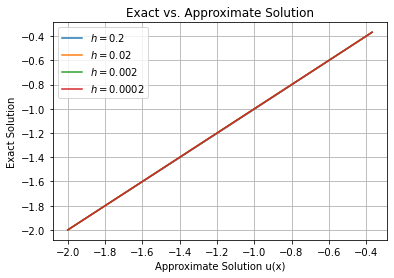

In [14]:
plt.plot(u1, exact_sol_1,label=f'$h = 0.2$')
plt.plot(u2, exact_sol_2,label=f'$h = 0.02$')
plt.plot(u3, exact_sol_3,label=f'$h = 0.002$')
plt.plot(u4, exact_sol_4,label=f'$h = 0.0002$')

#plt.plot(x1, u1,label=f'$h = 0.2$, Approx. Solution')
#plt.plot(x2, u2,label=f'$h = 0.02$')
#plt.plot(x3, u3,label=f'$h = 0.002$')
#plt.plot(x4, u4,label=f'$h = 0.0002$')

plt.xlabel('Approximate Solution u(x)')
plt.ylabel('Exact Solution')
plt.title('Exact vs. Approximate Solution')
plt.legend()
plt.grid()
plt.show()

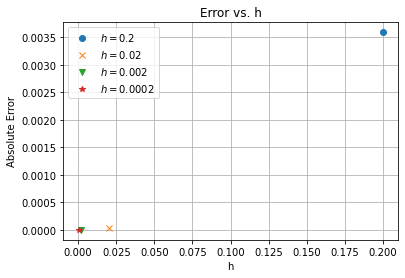

In [15]:
plt.plot(0.2, max(error1),'o',label=f'$h = 0.2$')
plt.plot(0.02, max(error2),'x',label=f'$h = 0.02$')
plt.plot(0.002, max(error3),'v',label=f'$h = 0.002$')
plt.plot(0.0002, max(error4),'*',label=f'$h = 0.0002$')
plt.xlabel('h')
plt.ylabel('Absolute Error')
plt.title('Error vs. h')
plt.legend()
plt.grid()
plt.show()

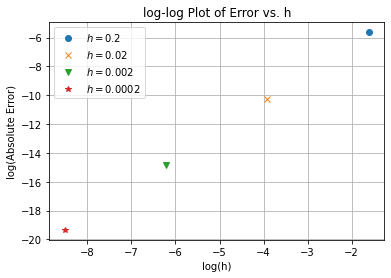

In [16]:
# create log log plot for order of accuracy
plt.plot(np.log(0.2), np.log(max(error1)),'o',label=f'$h = 0.2$')
plt.plot(np.log(0.02), np.log(max(error2)),'x',label=f'$h = 0.02$')
plt.plot(np.log(0.002), np.log(max(error3)),'v',label=f'$h = 0.002$')
plt.plot(np.log(0.0002), np.log(max(error4)),'*',label=f'$h = 0.0002$')
plt.xlabel('log(h)')
plt.ylabel('log(Absolute Error)')
plt.title('log-log Plot of Error vs. h')
plt.legend()
plt.grid()
plt.show()

In [17]:
#Slope
y2 = np.log(max(error1))
y1 = np.log(max(error2))
x2 = np.log(0.2)
x1 = np.log(0.02)
slope = (y2-y1)/(x2-x1)            
print(slope)

2.0097618526965686


* The order of accuracy from the log-log plot is 2 which is quadratic.

---

$\pagebreak$

# Problem 3

## (a) Plot the solution u(x) vs x (N=5, 10, 20, 100) in a single plot with both axes and legend. Use Gaussian integration (1 point) to calculate the integrals.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    #return 6*x
    return 3*x**2 - 4

def time(v,h,t_prev,t_next):
    return (v*h+(t_prev+t_next))/2

def phi1(v):
    return (-v+1)/2

def phi2(v):
    return (v+1)/2

def One_Point_Gauss_Phi1(h,time,f,v,t_prev,t_next,phi1):
    return (h/2)*(2*f(time(v,h,t_prev,t_next))*phi1(time(v,h,t_prev,t_next)))

def One_Point_Gauss_Phi2(h,time,f,v,t_prev,t_next,phi2):
    return (h/2)*(2*f(time(v,h,t_prev,t_next))*phi2(time(v,h,t_prev,t_next)))

In [19]:
#from sympy import *

#v=Symbol('v')

def Galerkin_Method(a,b,N,h,alpha,beta,v):
    t = np.linspace(a,b,int(N))
    #print(f"Discretized Time: {t}")
    
    mat_size = (int(N),int(N))
    A = np.zeros(mat_size)
    A[0,0] = 1
    A[int(N-1),int(N-1)] = 1 
    #print(f"Initialize A = {A}")
    
    for idx in range(1,int(N)-1):
        A[idx,idx-1] = 1/h
        A[idx,idx] = -2/h
        A[idx, idx+1] = 1/h
    #print(f"Final Matrix A = {A}")
    
    B = np.zeros(int(N))
    B[0] = alpha
    B[int(N)-1] = beta
    #print(f"Initialize b = {B}")
    for idx in range(0,len(t)):
        #print(idx)
        try:
            t_prev = t[idx]
            #print(f"t_prev = {t_prev}")
            t_current = t[idx+1]
            #print(f"t_current = {t_current}")
            t_next = t[idx+2]
            #print(f"t_next = {t_next}")
        
            #time_val1 = time(v,h,t_prev,t_current)
            #time_val2 = time(v,h,t_current,t_next)
            #print(time_val1,time_val2)
            integ1 = One_Point_Gauss_Phi1(h,time,f,v,t_prev,t_current,phi1)
            integ2 = One_Point_Gauss_Phi2(h,time,f,v,t_current,t_next,phi2)
            integ_sum = integ1+integ2
        
            B[idx+1] = integ_sum
        except:
            continue
    #print(f"Final b = {B}")
    
    Y = np.linalg.solve(A,B)
    #print(f"Solution Vector of Unknowns = {Y}")
    
    plt.plot(t,Y, '-o',label='$u(x) vs. x$')
    plt.title(f'Solution for N = {N}')
    plt.xlabel('$x$')
    plt.ylabel('$u(x)$')
    plt.legend()
    plt.grid()
    plt.show()
    return A, B, Y, t

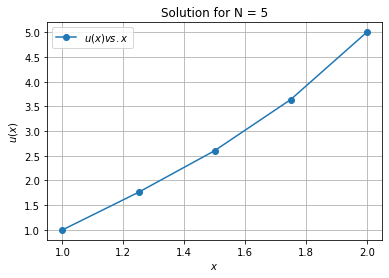

In [20]:
a = 1
b = 2
N = 5
h = (b-a)/N
alpha = 1
beta = 5
v = 0
A1, B1, Y1, t1 = Galerkin_Method(a,b,N,h,alpha,beta,v)

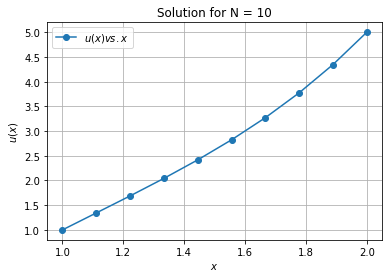

In [21]:
a = 1
b = 2
N = 10
h = (b-a)/N
alpha = 1
beta = 5
v = 0
A2, B2, Y2, t2 = Galerkin_Method(a,b,N,h,alpha,beta,v)

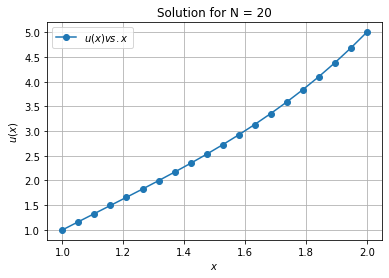

In [22]:
a = 1
b = 2
N = 20
h = (b-a)/N
alpha = 1
beta = 5
v = 0
A3, B3, Y3, t3 = Galerkin_Method(a,b,N,h,alpha,beta,v)

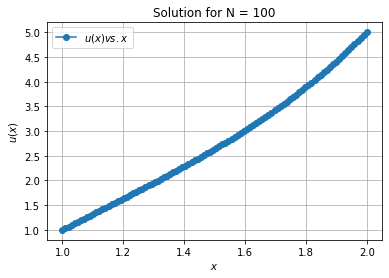

In [23]:
a = 1
b = 2
N = 100
h = (b-a)/N
alpha = 1
beta = 5
v = 0
A4, B4, Y4, t4 = Galerkin_Method(a,b,N,h,alpha,beta,v)

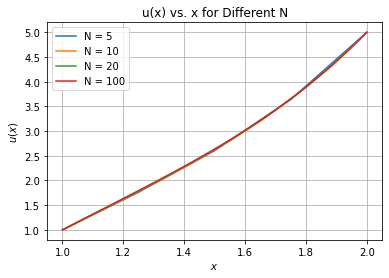

In [24]:
plt.plot(t1,Y1,label='N = 5')
plt.plot(t2,Y2,label='N = 10')
plt.plot(t3,Y3,label='N = 20')
plt.plot(t4,Y4,label='N = 100')
plt.title('u(x) vs. x for Different N')
plt.xlabel('$x$')
plt.ylabel('$u(x)$')
plt.legend()
plt.grid()
plt.show()

---

$\pagebreak$

## (b) Discuss your results.

* Slight variation in the values of unknowns can be seen from the plot for different values of N.
* But all the solutions are converging and accurate as the value of unknowns do not differ significantly from each other.

---

$\pagebreak$

# Problem 4

## (a) Write down the discretized version of the PDE.

$h_{i}^{k+1} = h_{i}^{k} + \frac{k\Delta t}{(\Delta x)^2}(h_{i+1}^{k} - 2h_{i}^{k} + h_{i-1}^{k})$

--- 

$\pagebreak$

## (b) Solve this partial differential equation with k= 500 and determine h(𝑥, 𝑡) at different time t=2, 5, 10, 20. Plot the results with both axes and legend.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return (1/4)*(1-np.tanh(x-2))*(x**2)+(1+np.tanh(x-2))*np.exp(-(x-2))

def One_D_Heat_Equation(L,Nx,T,Nt,c,f):
    x = np.linspace(0, L, Nx+1) # mesh points in space
    dx = x[1] - x[0]
    t = np.linspace(0, T, Nt+1)    # time discretization
    dt = t[1] - t[0]
    D = c*dt/dx**2
    print(f"The Value of D is: {D}")
    if D<= 1/2:
        print('Stable')
    else:
        print('Unstable')
    
    u   = np.zeros(Nx+1)           # approximation u at current time
    u_n = np.zeros(Nx+1)           # approximation u at previous time
    
    # Set initial condition u(x,0) = I(x)
    for i in range(0, Nx+1):
        u_n[i] = 0
        
    for n in range(0, Nt):
    # Compute u at inner mesh points
        for i in range(1, Nx):
            u[i] = u_n[i] + D*(u_n[i-1] - 2*u_n[i] + u_n[i+1])
    
        # Insert boundary conditions
        u[0] = 0;  
        u[Nx] = f(t[n])
        
        # Update u_n before next step    
        u_n[:]= u 
        
    plt.plot(x, u_n,label = "h(x,t) at time step n = %i"  %n )
    plt.plot(0,u_n[0], 'o', label = '1st Boundary Condition at t = 0')
    plt.plot(1000,f(T), '*', label = f'2nd Boundary Condition at t = {T}')
    plt.title(f"$h(x,t)$ at t = {T}")
    plt.xlabel('x')
    plt.ylabel('h(x,t)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return x,u_n

The Value of D is: 0.125
Stable


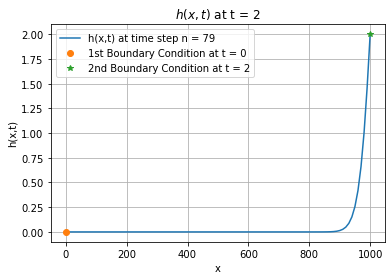

In [26]:
L=1000
Nx=100
T=2
Nt=80
c=500

x1,u1 = One_D_Heat_Equation(L,Nx,T,Nt,c,f)

The Value of D is: 0.125
Stable


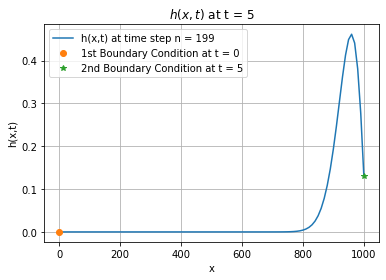

In [27]:
L=1000
Nx=100
T=5
Nt=200
c=500

x2,u2 = One_D_Heat_Equation(L,Nx,T,Nt,c,f)

The Value of D is: 0.125
Stable


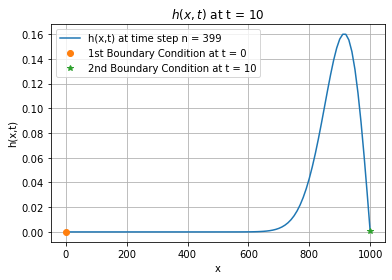

In [28]:
L=1000
Nx=100
T=10
Nt=400
c=500

x3,u3 = One_D_Heat_Equation(L,Nx,T,Nt,c,f)

The Value of D is: 0.125
Stable


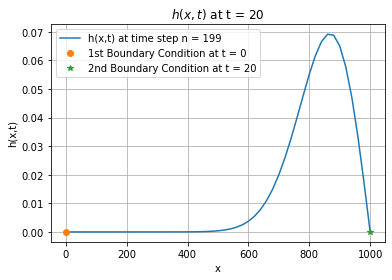

In [29]:
L=1000
Nx=50
T=20
Nt=200
c=500

x4,u4 = One_D_Heat_Equation(L,Nx,T,Nt,c,f)

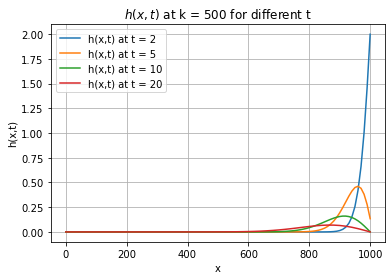

In [30]:
plt.plot(x1, u1,label = "h(x,t) at t = 2")
plt.plot(x2, u2,label = "h(x,t) at t = 5")
plt.plot(x3, u3,label = "h(x,t) at t = 10")
plt.plot(x4, u4,label = "h(x,t) at t = 20")
#plt.plot(0,u_n[0], 'o', label = '1st Boundary Condition at t = 0')
#plt.plot(1000,f(T), '*', label = f'2nd Boundary Condition at t = {T}')
plt.title(f"$h(x,t)$ at k = 500 for different t")
plt.xlabel('x')
plt.ylabel('h(x,t)')
plt.legend()
plt.grid(True)
plt.show()

---

$\pagebreak$

## (c) Plot the solutions at t=2, for k=5, 50, 500 in a single plot.

The Value of D is: 0.00125
Stable


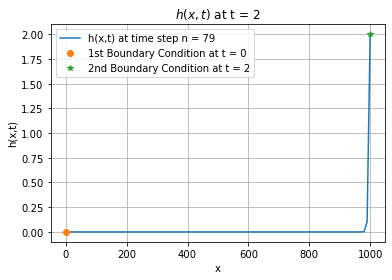

In [31]:
L=1000
Nx=100
T=2
Nt=80
c=5

x1,u1 = One_D_Heat_Equation(L,Nx,T,Nt,c,f)

The Value of D is: 0.0125
Stable


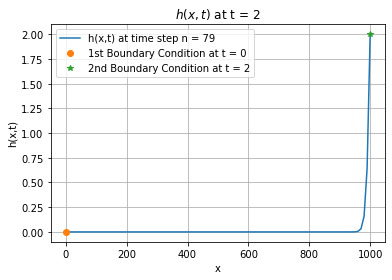

In [32]:
L=1000
Nx=100
T=2
Nt=80
c=50

x2,u2 = One_D_Heat_Equation(L,Nx,T,Nt,c,f)

The Value of D is: 0.125
Stable


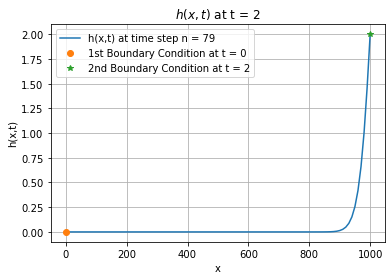

In [33]:
L=1000
Nx=100
T=2
Nt=80
c=500

x3,u3 = One_D_Heat_Equation(L,Nx,T,Nt,c,f)

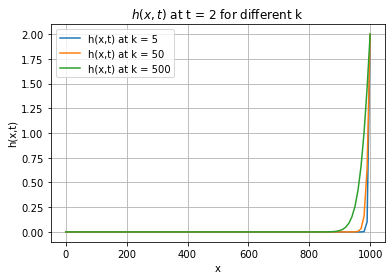

In [34]:
plt.plot(x1, u1,label = "h(x,t) at k = 5")
plt.plot(x2, u2,label = "h(x,t) at k = 50")
plt.plot(x3, u3,label = "h(x,t) at k = 500")
plt.title(f"$h(x,t)$ at t = 2 for different k")
plt.xlabel('x')
plt.ylabel('h(x,t)')
plt.legend()
plt.grid(True)
plt.show()